In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.utils import resample
from sklearn.preprocessing import scale  # Corrección de importación

In [24]:
# Leer el archivo
df = pd.read_csv("/home/paola/Descargas/spotify_limpio.csv")
# Renombrar y contar
df = df.rename(columns={'danceability': 'dan'})
class_count = df['dan'].value_counts()

In [25]:
# Crear gráfica de distribución de clases
def check_class_distribution(df):
   class_count = df['dan'].value_counts()
   print(class_count)
   plt.bar(class_count.index, class_count.values)
   plt.xlabel('Classes')
   plt.ylabel('Frequency')
   plt.title('Class Distribution')
   plt.xticks(rotation=45)
   plt.show()

dan
1    431
0    413
Name: count, dtype: int64


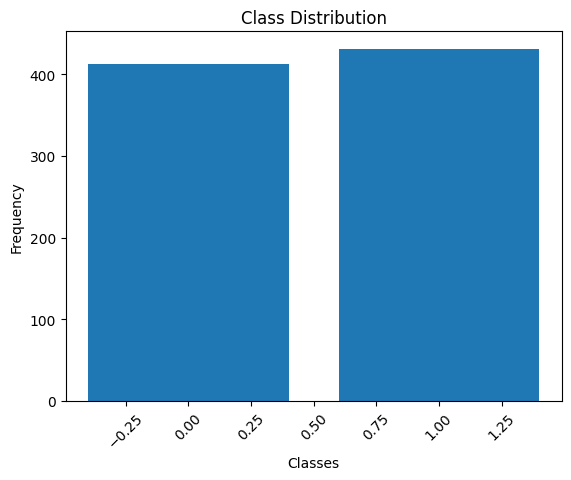

In [26]:
check_class_distribution(df)

dan
0    413
1    413
Name: count, dtype: int64


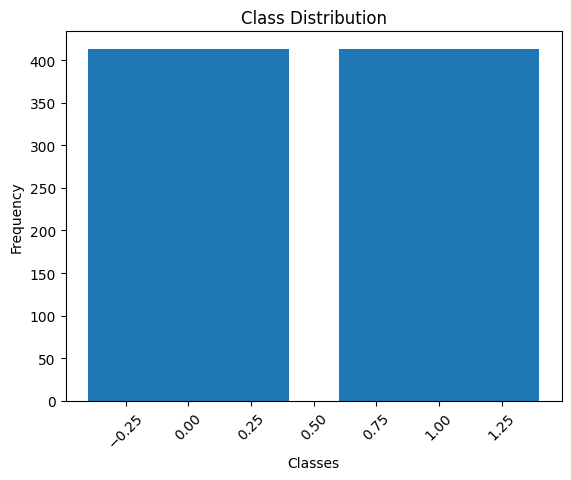

In [27]:
# Separar las clases mayoritarias y minoritarias
majority_class = df[df['dan'] == 1]
minority_class = df[df['dan'] == 0]
# Submuestrear la clase mayoritaria para igualar el tamaño de la clase minoritaria
majority_downsampled = resample(majority_class, replace=False, n_samples=len(minority_class), random_state=42)
# Concatenar los DataFrames subsampleados y la clase minoritaria
balance_df = pd.concat([majority_downsampled, minority_class])
# Mezclar aleatoriamente el DataFrame balanceado
balance_df = balance_df.sample(frac=1, random_state=42)
# Verificar la distribución de clases en el DataFrame balanceado
check_class_distribution(balance_df)

In [28]:
# Preprocesamiento de datos
X = balance_df.drop('dan', axis=1)
y = balance_df['dan']
# Normalización de características
X = scale(X)  # Corrección de llamada a la función

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:246: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


In [29]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
param_grid = {'C': np.logspace(-4, 4, 20), 'penalty': ['l1', 'l2'], 'solver': ['liblinear'], 'max_iter': [100, 500, 1000]}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

In [31]:
# Construir el modelo con los mejores parámetros encontrados
logreg = LogisticRegression(**best_params)
logreg.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = logreg.predict(X_test)


In [32]:
# Matriz de confusión y métricas de evaluación
cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cnf_matrix)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))

Confusion Matrix:
[[52 22]
 [31 61]]
Accuracy: 0.6807228915662651
Precision: 0.7349397590361446


Text(0.5, 427.9555555555555, 'Predicted label')

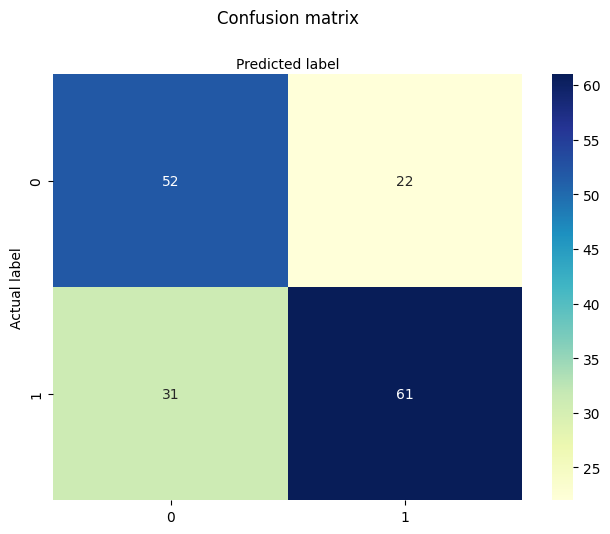

In [33]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')